# Download Modules and import Libraries

In [ ]:
!pip install contractions
!pip install emoji
!pip install nltk

import pandas as pd
import contractions  # Import contractions package for contraction expansion
import re
import emoji
import nltk
from nltk.stem import WordNetLemmatizer  # Word lemmatization

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



# Load the Dataset


In [ ]:
file_path = "Tweets.csv"
df = pd.read_csv(file_path)
df.head()

,airline_sentiment,sentiment_confidence,text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,@VirginAmerica and it's a really big bad thing...



# Data Cleaning and Preparation

1. Importing Libraries
2. Downloading NLTK Resources: Download NLTK resources (stopwords, wordnet)
3. Defining Airline List: Create a list of airlines to identify in the tweets.
4. Creating clean_text Function:

  * Convert Emojis to Text
  * Expand Contractions
  * Remove Hashtags but keep word
  * Extract Airline Mentions and then remove them
  * Detect and Remove Hyperlinks
  * Remove Punctuation and Convert to Lowercase
  * Remove Special Characters
  * Apply Lemmatization

5. Apply Cleaning Function: Apply the clean_text function to the dataset.
6. Display DataFrame: Display the cleaned DataFrame with emojis removed by viewing df[380:391].

In [ ]:
# Define the list of airlines (case-insensitive)
airline_list = ["VirginAmerica", "united", "SouthwestAir", "JetBlue", "USAirways", "AmericanAir"]

def clean_text(text):

    # Convert emojis to text descriptions
    text = emoji.demojize(text, delimiters=(" ", " "))  # 😊 → " smiley face "

    # Expand contractions (e.g., "can't" → "cannot")
    text = contractions.fix(text)

    # Remove hashtags but keep words (e.g., "#happy" → "happy")
    text = re.sub(r'#(\w+)', r'\1', text)

    # Extract airline name if mentioned
    airline_pattern = r'@(' + '|'.join(airline_list) + r')\b'
    match = re.search(airline_pattern, text, re.IGNORECASE)
    airline = match.group(1) if match else "Unknown"

    # Remove airline mentions
    text = re.sub(airline_pattern, '', text, flags=re.IGNORECASE).strip()

    # Detect and remove hyperlinks
    link_pattern = r'http\S+'
    has_link = 1 if re.search(link_pattern, text) else 0
    text = re.sub(link_pattern, '', text).strip()

    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()

    # Remove underscores
    text = text.replace('_', ' ')
    text = text.replace('-', ' ')

    # Apply lemmatization
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words]
    text = " ".join(words)

    return airline, has_link, text

# Apply function and create new columns
df[['airline', 'has_link', 'clean_text']] = df['text'].apply(lambda x: pd.Series(clean_text(x)))


# Display first few rows of the emoji-converted text
df[380:391]



,airline_sentiment,sentiment_confidence,text,airline,has_link,clean_text
380,positive,1.0000,@VirginAmerica gave a credit for my Late Fligh...,VirginAmerica,0,gave a credit for my late flight flight yester...
381,neutral,1.0000,@VirginAmerica I need a receipt for a flight c...,VirginAmerica,0,i need a receipt for a flight change can you s...
382,negative,1.0000,"@VirginAmerica, I submitted a status match req...",VirginAmerica,0,i submitted a status match request a while bac...
383,positive,1.0000,@VirginAmerica had me at their safety video . ...,VirginAmerica,1,had me at their safety video loved my first cr...
384,positive,0.6871,@VirginAmerica that doesn't look to fat to me!...,VirginAmerica,0,that doe not look to fat to me it look yummy
385,neutral,1.0000,@VirginAmerica CEO says #Southwest &amp; #jetb...,VirginAmerica,1,ceo say southwest amp jetblue have strayed fro...
386,neutral,0.6811,@VirginAmerica a brilliant brisk am in Boston ...,VirginAmerica,1,a brilliant brisk am in boston in cue for vx363
387,neutral,1.0000,@VirginAmerica Atlantic ploughs a lone furrow ...,VirginAmerica,1,atlantic plough a lone furrow in the middleeas...
388,neutral,1.0000,@VirginAmerica Atlantic ploughs a lone furrow ...,VirginAmerica,1,atlantic plough a lone furrow in the middleeas...
389,neutral,0.7026,@VirginAmerica Atlantic ploughs a lone furrow ...,VirginAmerica,1,atlantic plough a lone furrow in the middleeas...


# Further Data Analysis and Visualization

---
Analysing spread of the data and check for imbalance



In [ ]:
df['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2362


**Visualization of the class distributions using barplots**



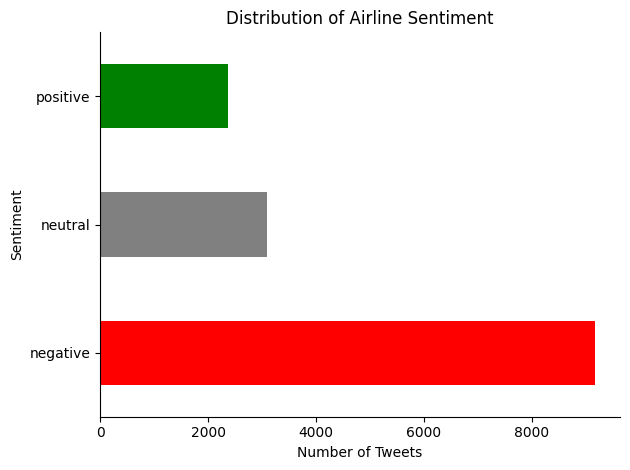

In [ ]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns

# Group data and get counts for each sentiment
sentiment_counts = df.groupby('airline_sentiment').size()

# Define custom colors for sentiment categories
colors = {'negative': 'red', 'neutral': 'gray', 'positive': 'green'}

# Create the bar plot with custom colors
ax = sentiment_counts.plot(kind='barh', color=[colors[s.lower()] for s in sentiment_counts.index])

# Customize plot appearance
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Airline Sentiment')  # Add a title
plt.xlabel('Number of Tweets')  # Label the x-axis
plt.ylabel('Sentiment')  # Label the y-axis
plt.tight_layout()  # Adjust layout for better spacing

plt.show()  # Display the plot

**Analysing spread of sentiment classes across different airlines**




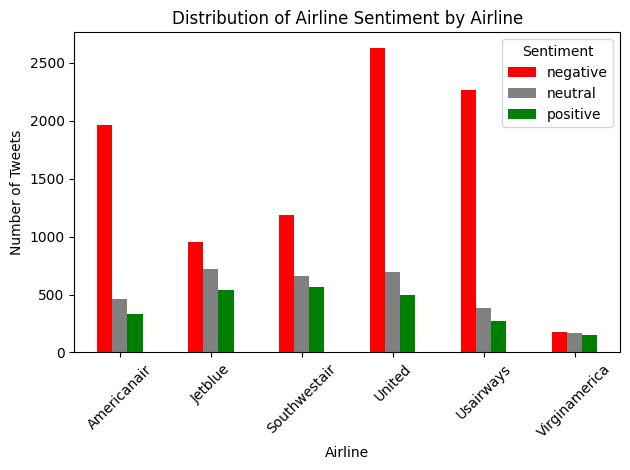

In [ ]:
import pandas as pd

# Correct airline names into the same format
df['airline'] = df['airline'].str.title()

# Group data by airline and sentiment, then count
sentiment_counts = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()

sentiment_counts = sentiment_counts.drop(sentiment_counts.index[sentiment_counts.index == 'Unknown'], errors='ignore', axis=0)

# Create the grouped bar plot with custom colors
ax = sentiment_counts.plot(kind='bar', color=colors, rot=45)  # rot=0 for horizontal x-axis labels

# Customize plot appearance
plt.title('Distribution of Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.tight_layout()

plt.show()

# Visual Representation of words with high frequency of occurences using wordclouds
Finding common words associated with a positive/negative/neutral sentiment

In [ ]:
from wordcloud import WordCloud, STOPWORDS

pos_tweets = df[df['airline_sentiment'] == 'positive']['clean_text']
neg_tweets = df[df['airline_sentiment'] == 'negative']['clean_text']
neu_tweets = df[df['airline_sentiment'] == 'neutral']['clean_text']

def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    stopwords.add('br')

    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)

    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()




Positive Word Cloud

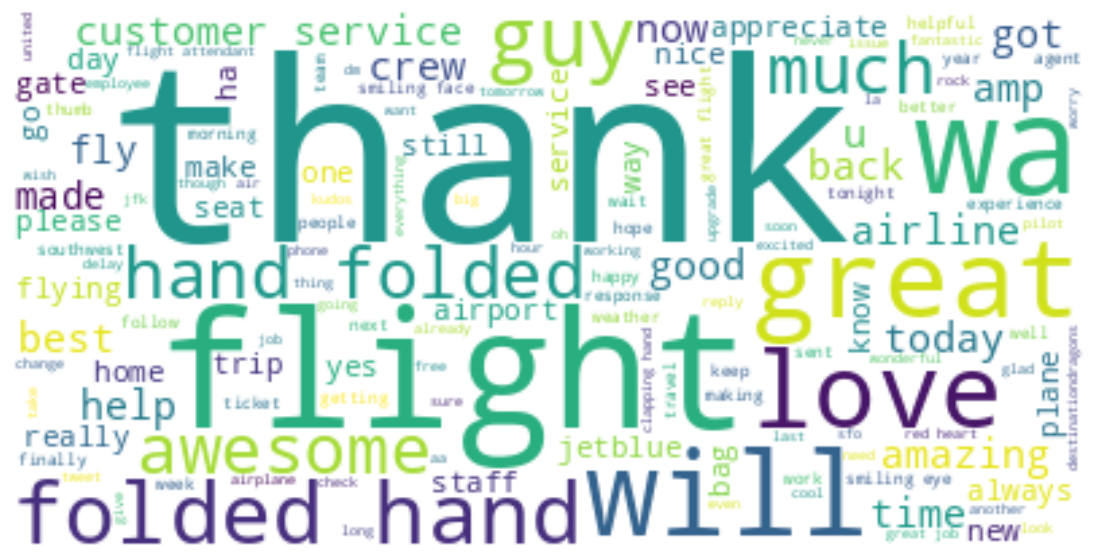

In [ ]:
# Positive Word Cloud
generate_wcloud(" ".join(pos_tweets))


Negative Word Cloud

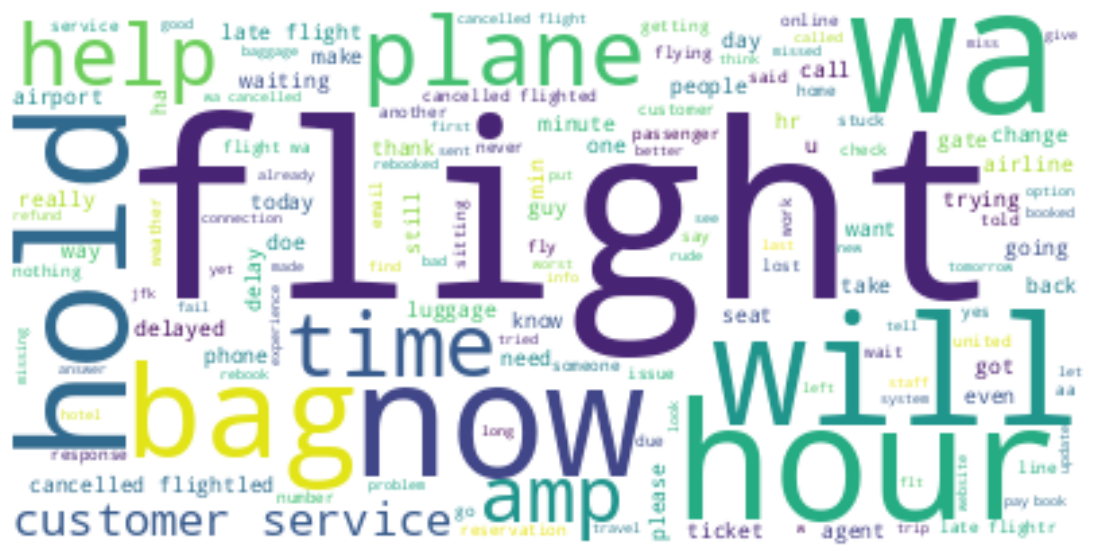

In [ ]:
# Negative Word Cloud
generate_wcloud(" ".join(neg_tweets))

Neutral Word Cloud

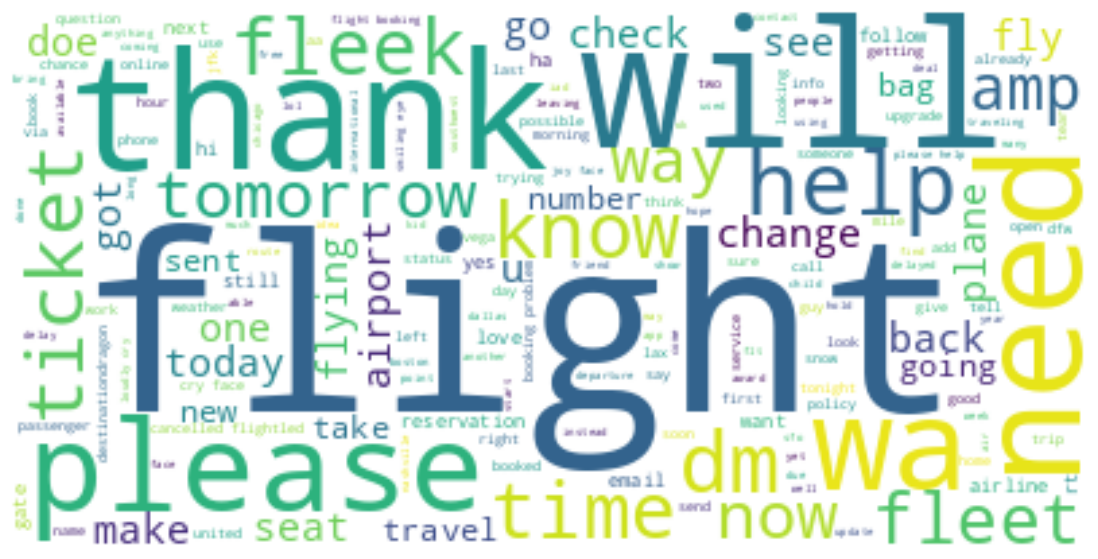

In [ ]:
# Neutral Word Cloud
generate_wcloud(" ".join(neu_tweets))